<a href="https://colab.research.google.com/github/isabellasims/Genetic-algorithm/blob/master/Plotting_genetic_alg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from random import choice, random, randint, shuffle
import numpy as np
import matplotlib.pyplot as plt

In [0]:
charset = list("abcdefghijklmnopqrstuvwxyz")
#goal = input("define a 3 letter gene you wish to generate : ")
#goal = list(goal)

goal = ["f","i","t"]
stringLength = len(goal)
million = goal[0] 

In [0]:
def MHcondition(individual):
    counter = 0    
    if million in individual:
      counter += 1          
    if counter == 1:
      return True
    else:
      return False    
    counter = 0

In [0]:
def fitness(individual):
  f = 0
  
  if MHcondition(individual) == True: 
    f +=1 # add 1 to fitness for combinations with correct condition for MH problem 
    if getSwitch(individual) == million:
      f+=2 # add 2 to fitness when MH problem works
  return f

In [0]:
def isGoal(individual):  
  if individual == goal:
    return True

In [0]:
def getSwitch(individual): 
  temp = individual
  pick = choice(temp)
  temp.remove(pick) # remove the random choice 
  for char in temp:
    if char!= million:
      goat = char
      temp.remove(goat)
    else: # this is accounting for an error I'm not sure why I have when a value is not assigned to goat despite the individual satisfying MH problem condition... Not super important because we don't care much about the goat value
      goat = choice(charset) 
  switch = temp
  #switch = np.array(switch,ndmin = 1) # fixes switch issue     
  return switch

In [1480]:
print(getSwitch(["f","o","h"]))
print(getSwitch(["p","o","h"]))

['h']
['o']


In [0]:
populationSize = 50
stringLength = 3
population = []
def makeContests():
  contestants = [[choice(charset) for _ in range(stringLength)] for _ in range(populationSize)]
  #print("contestants" ,contestants)
  return contestants

In [0]:
doors = []
goatDoors = []
def mhProblem(contestants):
    goat = ''
    pick = ''
    temp = ''   
    evolvedTemp = []  

    for i in contestants:       
      if MHcondition(i): 
        for j in i:
          evolvedTemp.append(j)         
        temp = i              
        switch = getSwitch(temp) 
        switch = np.array(switch,ndmin = 1) # fixes switch issue     
        #print("switch" , switch[0])
        evolvedTemp.remove(switch[0])
        evolvedTemp.insert(0, switch[0])
        doors.append(evolvedTemp)
        evolvedTemp = []
      else: 
        goatDoors.append(i) 
    return doors

In [0]:
# contestants = makeContests()
# print("contestants" , contestants)
# Doors = mhProblem(contestants)
# print("MH solved" , Doors, "Eligable for MH: " , len(Doors))
# population = Doors
# population.extend(goatDoors)
# print(population)



#ndmin : int, optional

In [0]:
mutationRate = .1
def mutate(example):
  if MHcondition(example) == True:
    switch = getSwitch(example) 
    if len(switch) == 0: # Filtering out empty switch values
      genebank = [goal[0],choice(charset),choice(charset)] 
      return genebank
    switch = switch[0]
    genebank = [switch,choice(charset),choice(charset)] # idea is you put the switched value in here and try again for the rest try for another goal value bc MH condition should make you 2/3 sure that the switch is there]  
    return genebank
  else: # if the condition is not true here, force satisfy MH condition at first index if mutation 
    genebank = [goal[0],choice(charset),choice(charset)] 
    return genebank
def crossover(parent1, parent2): 
  combine = parent1 + parent2
  shuffle(combine)
  return combine[:3]

In [1485]:
print(mutate(['a','b','c']))
print(mutate(['f','b','c']))
print(crossover(mutate(['a','b','c']),mutate(['f','b','c'])))
#print(mutate(crossover(['a','b','c']),mutate(['f','b','c'])))

['f', 'v', 'k']
['f', 'm', 'y']
['l', 'f', 'f']


In [0]:
populationSize = 50
stringLength = 3
x = []
y = []
cords = []




def geneticAlgorithm():
    iterations = 0   
    #while True:  
    populationSize = 50
    contestants = makeContests()
    print(contestants)
    Doors = mhProblem(contestants)
    population = Doors
    population.extend(goatDoors)
    print("population:",population)

    while True:
      iterations += 1
      #mhProblem(contestants)
      for individual in population:
        if (isGoal(individual)):
          print(f"Found gene in {iterations} iterations at index {population.index(individual)}")
          cords.append(x)
          cords.append(y)
          return individual


      population.sort(key=fitness, reverse=True)
      
      parents = population[:10] # ---> top 10 candidates  
      fittest = population[:1]
      fittest = fittest[0] # unnesting list in order to plot and guage fitness
   
   
      x.append(iterations) 
      y.append(fitness(fittest))  
      population = [mutate(crossover(choice(parents),choice(parents))) for _ in range(populationSize)] # G
      for i in population: # final filter on population
        if len(i) != 3:
          population.pop(i)
      print("population sorted:",population)
  
  

In [1487]:
geneticAlgorithm()

[['x', 'd', 'x'], ['g', 'o', 'h'], ['r', 'i', 'i'], ['i', 'w', 'a'], ['e', 'j', 'm'], ['p', 'q', 'l'], ['y', 'z', 'w'], ['t', 'o', 'c'], ['f', 'r', 'f'], ['f', 'w', 'e'], ['j', 'e', 'z'], ['v', 'w', 'r'], ['c', 'z', 'j'], ['a', 'b', 'b'], ['i', 'c', 'z'], ['r', 'u', 'j'], ['b', 'n', 'f'], ['o', 't', 'd'], ['k', 'q', 'g'], ['l', 'e', 'i'], ['j', 'r', 'p'], ['p', 'd', 'a'], ['i', 'g', 'd'], ['e', 'h', 'y'], ['l', 'y', 'j'], ['j', 'i', 't'], ['i', 'g', 'g'], ['w', 's', 'f'], ['z', 'y', 'n'], ['l', 'z', 'i'], ['o', 'n', 'e'], ['m', 'm', 'h'], ['k', 'c', 'n'], ['f', 'f', 'u'], ['i', 'o', 'q'], ['d', 'g', 'h'], ['m', 'r', 'n'], ['h', 'h', 'a'], ['b', 'e', 'z'], ['w', 'c', 'p'], ['i', 'x', 'z'], ['c', 'z', 'p'], ['g', 'c', 'k'], ['r', 'x', 'o'], ['p', 'e', 'r'], ['k', 'l', 'r'], ['o', 't', 'y'], ['x', 'f', 'j'], ['n', 'g', 'd'], ['o', 'x', 'x']]
population: [['f', 'r', 'f'], ['e', 'f', 'w'], ['n', 'b', 'f'], ['f', 'w', 's'], ['f', 'f', 'u'], ['j', 'x', 'f'], ['x', 'd', 'x'], ['g', 'o', 'h'], 

['f', 'i', 't']

iterations [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
most fit parent [1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1]


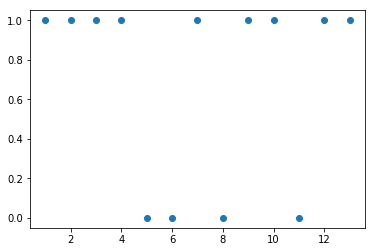

In [1488]:

x = cords[0]
y = cords[1]
print("iterations" , x)  
print("most fit parent" , y)
plt.plot(x,y,"o")
plt.show()